In [1]:
import pickle
import numpy as np
import sys
from pathlib import Path

# Add VI module to path
sys.path.append('/labs/Aguiar/SSPA_BRAY/BRay/VariationalInference')
from vi import VI

# Load Stage 1 results
results_path = Path('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_strong/progressive_validation/stage_1:_small_results.pkl')

with open(results_path, 'rb') as f:
    stage1_results = pickle.load(f)

# Display what's in the results
print("Stage 1 Results Keys:")
print(list(stage1_results.keys()))
print("\n" + "="*70)

# Show key metrics
print("\nKey Metrics:")
print(f"  Stage: {stage1_results['stage']}")
print(f"  N Samples: {stage1_results['n_samples']}")
print(f"  Training Time: {stage1_results['time']/60:.1f} minutes")
print(f"  F1 Score: {stage1_results['f1']:.3f}")
print(f"  Precision@50: {stage1_results['precision']:.3f}")
print(f"  Recall@50: {stage1_results['recall']:.3f}")
print(f"  Train AUC: {stage1_results['train_auc']:.3f}")
print(f"  Test AUC: {stage1_results['test_auc']:.3f}")
print(f"  Best Factor: {stage1_results['best_factor']}")
print(f"  V-weight: {stage1_results['v_weight']:.4f}")
print(f"  Final ELBO: {stage1_results['final_elbo']:.2f}")

# Access the trained model
model = stage1_results['model']
print(f"\nModel Parameters:")
print(f"  E_beta shape: {model.E_beta.shape}")
print(f"  E_theta shape: {model.E_theta.shape}")
print(f"  mu_v shape: {model.mu_v.shape}")

Stage 1 Results Keys:
['stage', 'n_samples', 'time', 'f1', 'precision', 'recall', 'train_auc', 'test_auc', 'best_factor', 'v_weight', 'final_elbo', 'model', 'train_probs', 'train_labels', 'test_probs', 'test_labels']


Key Metrics:
  Stage: Stage 1: Small
  N Samples: 300
  Training Time: 11.1 minutes
  F1 Score: 0.080
  Precision@50: 0.280
  Recall@50: 0.047
  Train AUC: 0.971
  Test AUC: 0.954
  Best Factor: 11
  V-weight: 0.0138
  Final ELBO: -3772291.61

Model Parameters:
  E_beta shape: (9860, 15)
  E_theta shape: (300, 15)
  mu_v shape: (1, 15)


In [2]:
# Load the saved model
model_path = Path('/labs/Aguiar/SSPA_BRAY/BRay/synthetic_strong/progressive_validation/stage_1:_small_model.pkl')

with open(model_path, 'rb') as f:
    stage1_model = pickle.load(f)

print("Stage 1 Model Keys:")
print(list(stage1_model.keys()))
print("\n" + "="*70)

# Access the model and its components
loaded_model = stage1_model['model']
print("\nLoaded Model Information:")
print(f"  E_beta shape: {stage1_model['E_beta'].shape}")
print(f"  E_theta shape: {stage1_model['E_theta'].shape}")
print(f"  mu_v shape: {stage1_model['mu_v'].shape}")
print(f"  Train AUC: {stage1_model['train_auc']:.3f}")
print(f"  Test AUC: {stage1_model['test_auc']:.3f}")

Stage 1 Model Keys:
['model', 'E_beta', 'E_theta', 'mu_v', 'sigma_v', 'mu_gamma', 'sigma_gamma', 'elbo_history', 'stage_info', 'train_probs', 'train_labels', 'test_probs', 'test_labels', 'train_auc', 'test_auc']


Loaded Model Information:
  E_beta shape: (9860, 15)
  E_theta shape: (300, 15)
  mu_v shape: (1, 15)
  Train AUC: 0.971
  Test AUC: 0.954


In [11]:
print("mu_v (Factor Coefficients for Classification):")
print(mu_v)
print(f"\nShape: {mu_v.shape}")
print("\nFactor coefficients:")
for i in range(mu_v.shape[1]):
    print(f"  Factor_{i}: {mu_v[0, i]:.6f}")

mu_v (Factor Coefficients for Classification):
[[-0.0263231  -0.06745392 -0.07218004  0.02223463  0.2266118   0.04341753
   0.00164126 -0.0188717  -0.12097866 -0.02659782  0.07799354  0.01377541
   0.28272575  0.01315785 -0.02229164]]

Shape: (1, 15)

Factor coefficients:
  Factor_0: -0.026323
  Factor_1: -0.067454
  Factor_2: -0.072180
  Factor_3: 0.022235
  Factor_4: 0.226612
  Factor_5: 0.043418
  Factor_6: 0.001641
  Factor_7: -0.018872
  Factor_8: -0.120979
  Factor_9: -0.026598
  Factor_10: 0.077994
  Factor_11: 0.013775
  Factor_12: 0.282726
  Factor_13: 0.013158
  Factor_14: -0.022292


In [12]:
# Create DataFrame for E_beta with factor columns and gene indices
beta_df = pd.DataFrame(
    E_beta,
    columns=[f'Factor_{i}' for i in range(E_beta.shape[1])]
)
beta_df.insert(0, 'Gene_ID', range(E_beta.shape[0]))

print("E_beta DataFrame:")
print(beta_df.head(10))
print(f"\nShape: {beta_df.shape}")
print(f"\nSummary statistics for each factor:")
print(beta_df.iloc[:, 1:].describe())

# Show genes with highest loadings for each factor
print("\n" + "="*70)
print("\nTop 5 genes for each factor:")
for factor in range(E_beta.shape[1]):
    factor_col = f'Factor_{factor}'
    top_genes = beta_df.nlargest(5, factor_col)[['Gene_ID', factor_col]]
    print(f"\n{factor_col}:")
    print(top_genes.to_string(index=False))

E_beta DataFrame:
   Gene_ID  Factor_0  Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  \
0        0  0.180884  0.100515  0.135042  0.165242  0.179791  0.137236   
1        1  0.151075  0.262780  0.177975  0.202972  0.203485  0.202597   
2        2  0.009355  0.070619  0.071902  0.012694  0.001613  0.011629   
3        3  0.361886  0.288001  0.157473  0.335314  0.165892  0.247590   
4        4  0.150037  0.076366  0.069833  0.139602  0.001602  0.117243   
5        5  0.166220  0.368509  0.140145  0.191483  0.231792  0.244772   
6        6  0.114038  0.088976  0.166976  0.013205  0.073459  0.112424   
7        7  0.086239  0.077308  0.004557  0.012343  0.001634  0.011363   
8        8  0.240922  0.121909  0.080627  0.292827  0.097874  0.136690   
9        9  0.028627  0.004544  0.004616  0.011997  0.001700  0.011073   

   Factor_6  Factor_7  Factor_8  Factor_9  Factor_10  Factor_11  Factor_12  \
0  0.047385  0.152255  0.068342  0.112841   0.133400   0.020317   0.087544   
1  0.056938

In [13]:
beta_df

,Gene_ID,Factor_0,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,Factor_11,Factor_12,Factor_13,Factor_14
0,0,0.180884,0.100515,0.135042,0.165242,0.179791,0.137236,0.047385,0.152255,0.068342,0.112841,0.133400,0.020317,0.087544,0.164663,0.133103
1,1,0.151075,0.262780,0.177975,0.202972,0.203485,0.202597,0.056938,0.168993,0.080361,0.197036,0.342027,0.190663,0.081875,0.246249,0.198683
2,2,0.009355,0.070619,0.071902,0.012694,0.001613,0.011629,0.034416,0.085519,0.112229,0.107219,0.006480,0.167035,0.001660,0.007795,0.010213
3,3,0.361886,0.288001,0.157473,0.335314,0.165892,0.247590,0.064638,0.282805,0.244451,0.222213,0.205855,0.390766,0.201488,0.228197,0.244213
4,4,0.150037,0.076366,0.069833,0.139602,0.001602,0.117243,0.036821,0.009154,0.002796,0.004790,0.006475,0.018637,0.057206,0.089558,0.120219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,9855,38.532941,14.906326,39.606373,258.777936,79.795595,189.322376,17.782672,116.143987,6.564576,20.432351,44.479614,257.028137,25.688218,3.154539,218.104403
9856,9856,5.070958,6.923437,3.891426,16.082704,3.961574,4.690368,3.752483,6.457931,2.075951,2.379469,2.382116,11.066028,2.379088,1.645420,13.428031
9857,9857,35.090368,20.530339,30.493188,187.870242,34.472261,81.383683,15.303979,80.553965,9.275086,33.850761,36.753969,114.113272,11.938799,6.361230,159.700521
9858,9858,10.663163,3.512217,11.251966,53.253464,11.716381,17.644209,14.441531,21.619591,6.505616,10.758013,12.879712,36.020324,8.263438,4.952207,34.493235


In [14]:
import pandas as pd

# Create sparsity analysis table for each factor

# Define thresholds to test
thresholds = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]

sparsity_data = []

for factor_idx in range(E_beta.shape[1]):
    factor_col = f'Factor_{factor_idx}'
    factor_values = E_beta[:, factor_idx]
    
    row_data = {
        'Factor': factor_col,
        'Mean': factor_values.mean(),
        'Std': factor_values.std(),
        'Min': factor_values.min(),
        'Max': factor_values.max(),
        'Median': np.median(factor_values)
    }
    
    # Count active genes at different thresholds
    for thresh in thresholds:
        n_active = np.sum(factor_values > thresh)
        pct_active = (n_active / len(factor_values)) * 100
        row_data[f'Active>{thresh}'] = n_active
        row_data[f'%>{thresh}'] = pct_active
    
    sparsity_data.append(row_data)

sparsity_df = pd.DataFrame(sparsity_data)

print("Factor Sparsity Analysis")
print("=" * 150)
print("\nBasic Statistics:")
print(sparsity_df[['Factor', 'Mean', 'Std', 'Min', 'Max', 'Median']].to_string(index=False))

print("\n" + "=" * 150)
print("\nNumber of Active Genes by Threshold:")
active_cols = ['Factor'] + [f'Active>{t}' for t in thresholds]
print(sparsity_df[active_cols].to_string(index=False))

print("\n" + "=" * 150)
print("\nPercentage of Active Genes by Threshold:")
pct_cols = ['Factor'] + [f'%>{t}' for t in thresholds]
print(sparsity_df[pct_cols].to_string(index=False))

# Display full dataframe
sparsity_df

Factor Sparsity Analysis

Basic Statistics:
   Factor     Mean      Std      Min        Max   Median
 Factor_0 0.730550 3.601483 0.008072 108.626247 0.197400
 Factor_1 0.716069 3.440117 0.003662  93.891559 0.166033
 Factor_2 0.574597 1.990838 0.003753  53.544118 0.154957
 Factor_3 0.712993 5.694766 0.011733 258.777936 0.222673
 Factor_4 0.729863 5.099365 0.001568 237.011561 0.138838
 Factor_5 0.614575 3.656736 0.010461 189.322376 0.220764
 Factor_6 0.418742 1.221745 0.027189  31.052354 0.058420
 Factor_7 0.622440 4.431826 0.008114 213.364151 0.180235
 Factor_8 0.616468 1.759748 0.002520  42.764572 0.134459
 Factor_9 0.535981 1.555839 0.004206  47.914915 0.148928
Factor_10 0.528311 1.752887 0.005569  55.766851 0.181925
Factor_11 0.618114 5.295233 0.016178 257.028137 0.222095
Factor_12 0.579260 1.840861 0.001483  60.260604 0.158089
Factor_13 0.678838 2.623839 0.007014  63.957051 0.203598
Factor_14 0.724546 7.224335 0.008960 332.432356 0.204195


Number of Active Genes by Threshold:
   Fa

,Factor,Mean,Std,Min,Max,Median,Active>0.001,%>0.001,Active>0.01,%>0.01,Active>0.1,%>0.1,Active>0.5,%>0.5,Active>1.0,%>1.0,Active>5.0,%>5.0,Active>10.0,%>10.0
0,Factor_0,0.730550,3.601483,0.008072,108.626247,0.197400,9860,100.0,8529,86.501014,8165,82.809331,2118,21.480730,1002,10.162272,162,1.643002,106,1.075051
1,Factor_1,0.716069,3.440117,0.003662,93.891559,0.166033,9860,100.0,8821,89.462475,6870,69.675456,2110,21.399594,1103,11.186613,165,1.673428,94,0.953347
2,Factor_2,0.574597,1.990838,0.003753,53.544118,0.154957,9860,100.0,8220,83.367140,6472,65.638945,2036,20.649087,1117,11.328600,161,1.632860,75,0.760649
3,Factor_3,0.712993,5.694766,0.011733,258.777936,0.222673,9860,100.0,9860,100.000000,8515,86.359026,2132,21.622718,932,9.452333,143,1.450304,73,0.740365
4,Factor_4,0.729863,5.099365,0.001568,237.011561,0.138838,9860,100.0,9053,91.815416,5901,59.847870,1824,18.498986,785,7.961460,137,1.389452,103,1.044625
5,Factor_5,0.614575,3.656736,0.010461,189.322376,0.220764,9860,100.0,9860,100.000000,8360,84.787018,2251,22.829615,1062,10.770791,117,1.186613,39,0.395538
6,Factor_6,0.418742,1.221745,0.027189,31.052354,0.058420,9860,100.0,9860,100.000000,3233,32.789047,2331,23.640974,1022,10.365112,88,0.892495,27,0.273834
7,Factor_7,0.622440,4.431826,0.008114,213.364151,0.180235,9860,100.0,7624,77.322515,7427,75.324544,2168,21.987830,1159,11.754564,119,1.206897,38,0.385396
8,Factor_8,0.616468,1.759748,0.002520,42.764572,0.134459,9860,100.0,8442,85.618661,5910,59.939148,2185,22.160243,1324,13.427992,215,2.180527,63,0.638945
9,Factor_9,0.535981,1.555839,0.004206,47.914915,0.148928,9860,100.0,8022,81.359026,6451,65.425963,2187,22.180527,1214,12.312373,125,1.267748,40,0.405680


In [15]:
import pandas as pd

In [16]:
# Create DataFrames for train and test data with predictions and true labels
train_df = pd.DataFrame({
    'predicted_prob': stage1_model['train_probs'].flatten(),
    'true_label': stage1_model['train_labels']
})

test_df = pd.DataFrame({
    'predicted_prob': stage1_model['test_probs'].flatten(),
    'true_label': stage1_model['test_labels']
})

print("Train DataFrame:")
print(train_df.head(10))
print(f"\nShape: {train_df.shape}")
print(f"True label distribution:\n{train_df['true_label'].value_counts()}")

print("\n" + "="*70)
print("\nTest DataFrame:")
print(test_df.head(10))
print(f"\nShape: {test_df.shape}")
print(f"True label distribution:\n{test_df['true_label'].value_counts()}")

Train DataFrame:
   predicted_prob  true_label
0        0.499054           0
1        0.573904           1
2        0.563637           1
3        0.495555           0
4        0.489913           0
5        0.559690           1
6        0.532625           1
7        0.536349           1
8        0.558435           1
9        0.500513           0

Shape: (300, 2)
True label distribution:
true_label
1    165
0    135
Name: count, dtype: int64


Test DataFrame:
   predicted_prob  true_label
0        0.508422           0
1        0.576463           1
2        0.525125           1
3        0.583809           1
4        0.496092           0
5        0.539980           1
6        0.541200           1
7        0.497324           0
8        0.528950           1
9        0.523026           1

Shape: (308, 2)
True label distribution:
true_label
1    171
0    137
Name: count, dtype: int64


In [17]:
train_df

,predicted_prob,true_label
0,0.499054,0
1,0.573904,1
2,0.563637,1
3,0.495555,0
4,0.489913,0
...,...,...
295,0.525562,1
296,0.562066,1
297,0.569368,1
298,0.500149,0


/tmp/ipykernel_1622638/3519524663.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(train_data_to_plot, labels=['Label 0', 'Label 1'])
/tmp/ipykernel_1622638/3519524663.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(test_data_to_plot, labels=['Label 0', 'Label 1'])


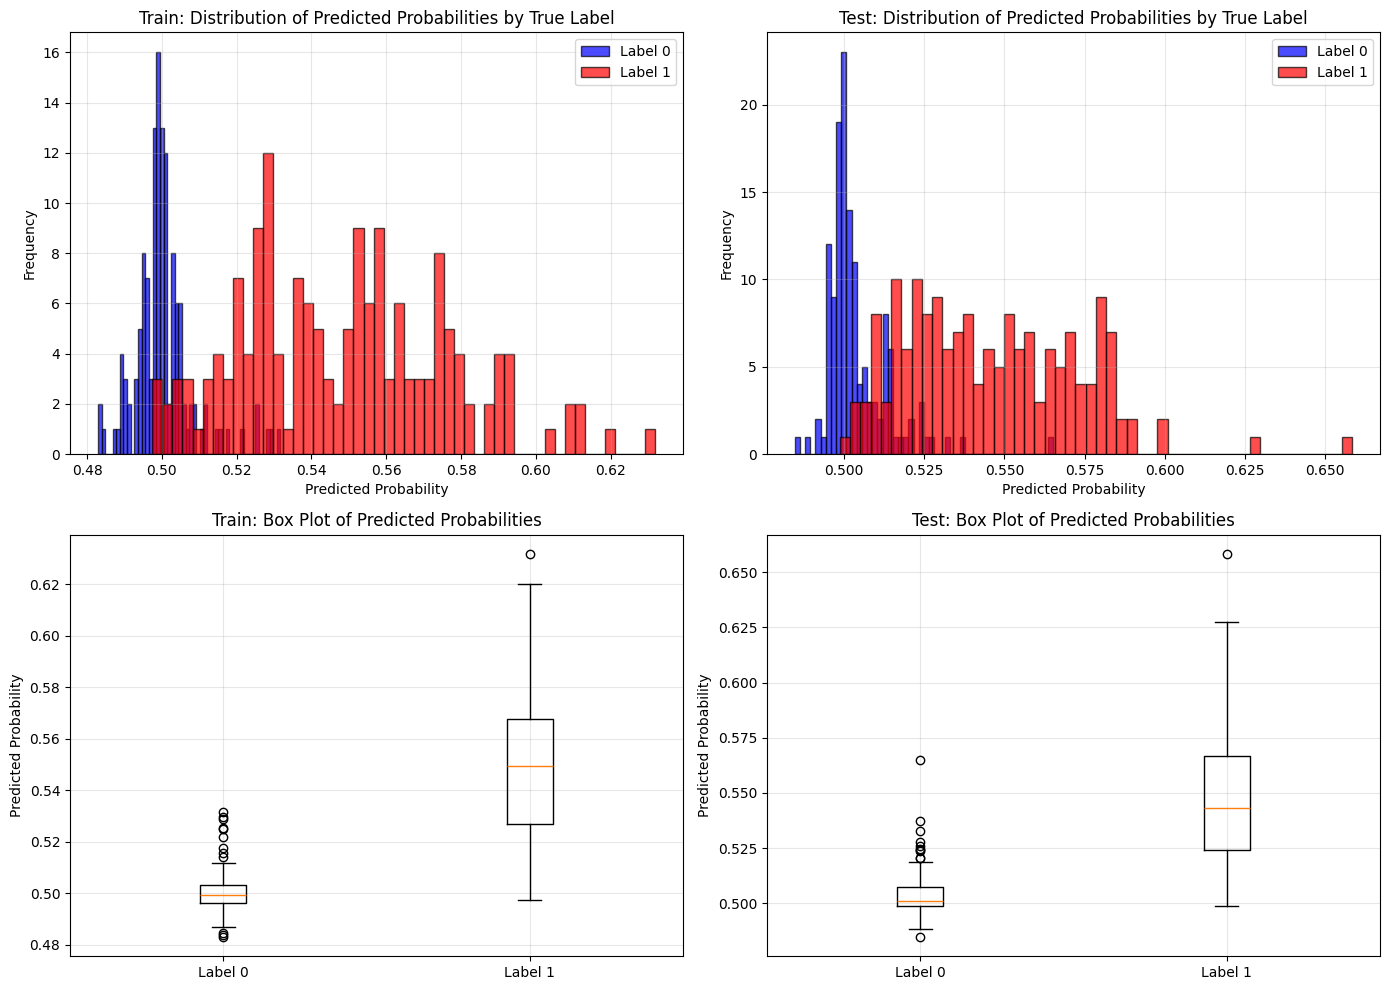

Train Data Statistics:
            count      mean       std       min       25%       50%       75%  \
true_label                                                                      
0           135.0  0.500425  0.008175  0.482907  0.496230  0.499347  0.503194   
1           165.0  0.548485  0.027845  0.497455  0.526847  0.549300  0.567836   

                 max  
true_label            
0           0.531715  
1           0.631911  


Test Data Statistics:
            count      mean       std       min       25%       50%       75%  \
true_label                                                                      
0           137.0  0.504043  0.010162  0.484624  0.498571  0.500852  0.507402   
1           171.0  0.545844  0.026886  0.498661  0.523969  0.543139  0.566717   

                 max  
true_label            
0           0.565098  
1           0.658364  


In [18]:
import matplotlib.pyplot as plt

# Create a figure with subplots for train and test
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Train data - histogram
axes[0, 0].hist(train_df[train_df['true_label'] == 0]['predicted_prob'], 
                bins=50, alpha=0.7, label='Label 0', color='blue', edgecolor='black')
axes[0, 0].hist(train_df[train_df['true_label'] == 1]['predicted_prob'], 
                bins=50, alpha=0.7, label='Label 1', color='red', edgecolor='black')
axes[0, 0].set_xlabel('Predicted Probability')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Train: Distribution of Predicted Probabilities by True Label')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Test data - histogram
axes[0, 1].hist(test_df[test_df['true_label'] == 0]['predicted_prob'], 
                bins=50, alpha=0.7, label='Label 0', color='blue', edgecolor='black')
axes[0, 1].hist(test_df[test_df['true_label'] == 1]['predicted_prob'], 
                bins=50, alpha=0.7, label='Label 1', color='red', edgecolor='black')
axes[0, 1].set_xlabel('Predicted Probability')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Test: Distribution of Predicted Probabilities by True Label')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Train data - box plot
train_data_to_plot = [train_df[train_df['true_label'] == 0]['predicted_prob'],
                      train_df[train_df['true_label'] == 1]['predicted_prob']]
axes[1, 0].boxplot(train_data_to_plot, labels=['Label 0', 'Label 1'])
axes[1, 0].set_ylabel('Predicted Probability')
axes[1, 0].set_title('Train: Box Plot of Predicted Probabilities')
axes[1, 0].grid(alpha=0.3)

# Test data - box plot
test_data_to_plot = [test_df[test_df['true_label'] == 0]['predicted_prob'],
                     test_df[test_df['true_label'] == 1]['predicted_prob']]
axes[1, 1].boxplot(test_data_to_plot, labels=['Label 0', 'Label 1'])
axes[1, 1].set_ylabel('Predicted Probability')
axes[1, 1].set_title('Test: Box Plot of Predicted Probabilities')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Train Data Statistics:")
print(train_df.groupby('true_label')['predicted_prob'].describe())
print("\n" + "="*70)
print("\nTest Data Statistics:")
print(test_df.groupby('true_label')['predicted_prob'].describe())

In [19]:
E_beta = stage1_model['E_beta']
E_theta = stage1_model['E_theta']
mu_v = stage1_model['mu_v']

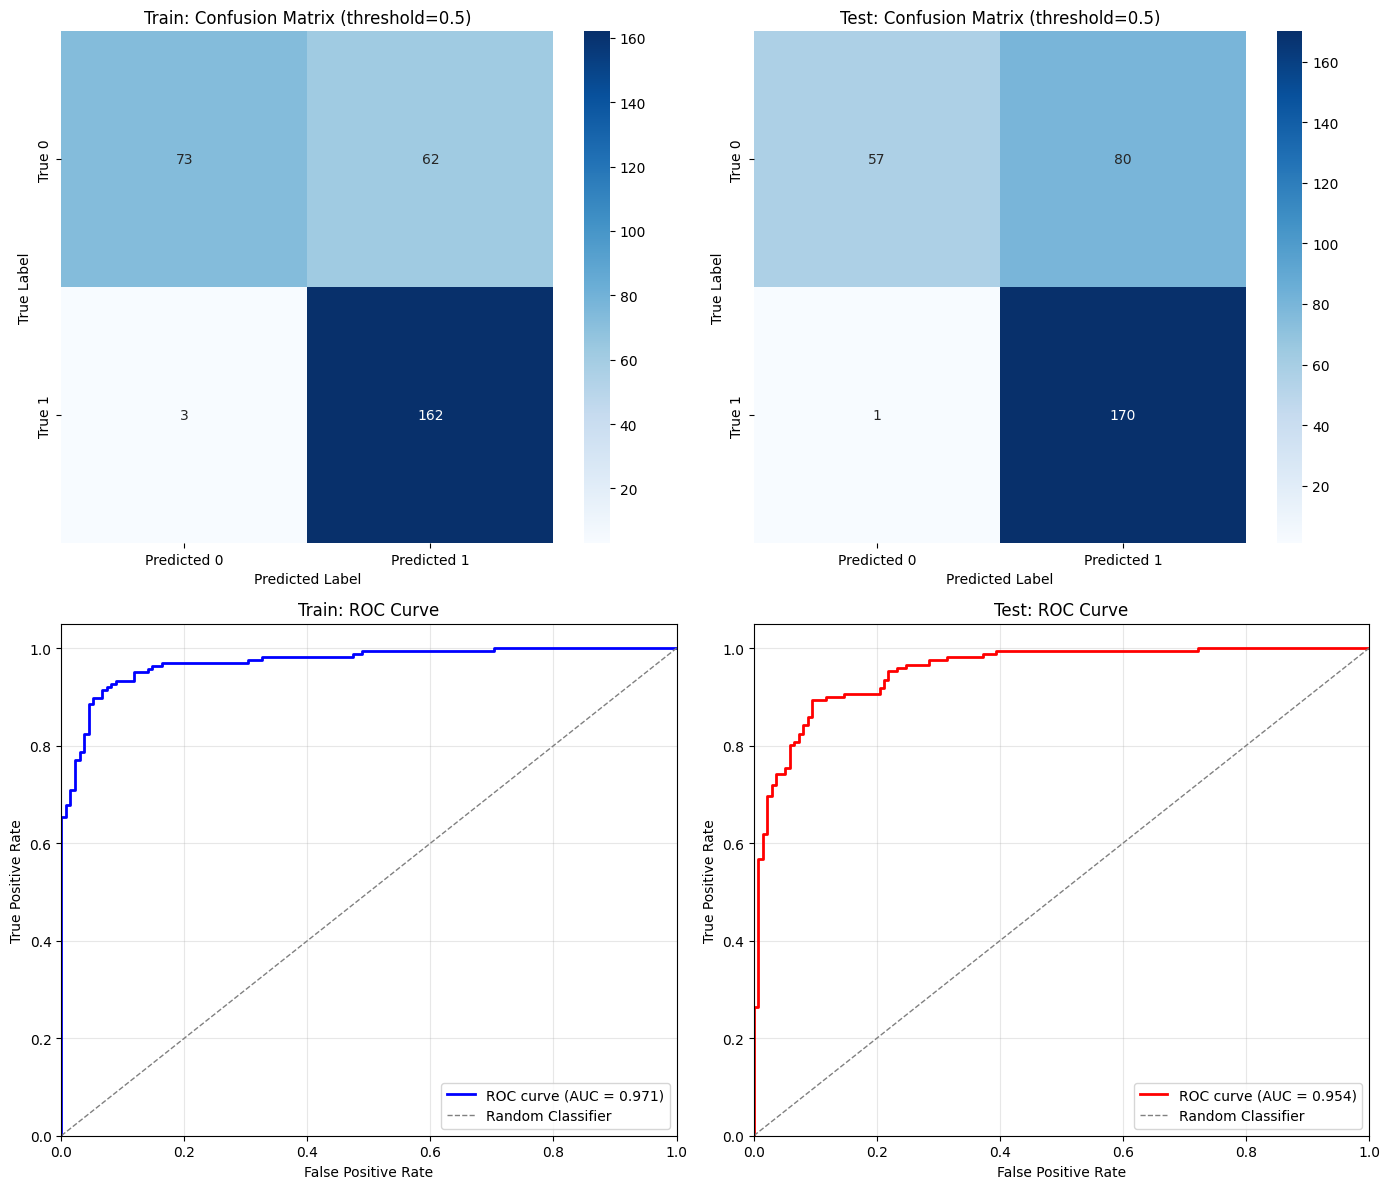

TRAIN SET METRICS
Confusion Matrix (threshold=0.5):
  True Negatives:  73
  False Positives: 62
  False Negatives: 3
  True Positives:  162

Accuracy:  0.783
Precision: 0.723
Recall:    0.982
AUC Score: 0.971

TEST SET METRICS
Confusion Matrix (threshold=0.5):
  True Negatives:  57
  False Positives: 80
  False Negatives: 1
  True Positives:  170

Accuracy:  0.737
Precision: 0.680
Recall:    0.994
AUC Score: 0.954


In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Create confusion matrices using 0.5 threshold
train_pred_labels = (train_df['predicted_prob'] >= 0.5).astype(int)
test_pred_labels = (test_df['predicted_prob'] >= 0.5).astype(int)

train_cm = confusion_matrix(train_df['true_label'], train_pred_labels)
test_cm = confusion_matrix(test_df['true_label'], test_pred_labels)

# Calculate ROC curves
train_fpr, train_tpr, train_thresholds = roc_curve(train_df['true_label'], train_df['predicted_prob'])
test_fpr, test_tpr, test_thresholds = roc_curve(test_df['true_label'], test_df['predicted_prob'])

train_auc_score = auc(train_fpr, train_tpr)
test_auc_score = auc(test_fpr, test_tpr)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Train confusion matrix
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
axes[0, 0].set_title('Train: Confusion Matrix (threshold=0.5)')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

# Test confusion matrix
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
axes[0, 1].set_title('Test: Confusion Matrix (threshold=0.5)')
axes[0, 1].set_ylabel('True Label')
axes[0, 1].set_xlabel('Predicted Label')

# Train ROC curve
axes[1, 0].plot(train_fpr, train_tpr, color='blue', lw=2, label=f'ROC curve (AUC = {train_auc_score:.3f})')
axes[1, 0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
axes[1, 0].set_xlim([0.0, 1.0])
axes[1, 0].set_ylim([0.0, 1.05])
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('Train: ROC Curve')
axes[1, 0].legend(loc='lower right')
axes[1, 0].grid(alpha=0.3)

# Test ROC curve
axes[1, 1].plot(test_fpr, test_tpr, color='red', lw=2, label=f'ROC curve (AUC = {test_auc_score:.3f})')
axes[1, 1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
axes[1, 1].set_xlim([0.0, 1.0])
axes[1, 1].set_ylim([0.0, 1.05])
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('Test: ROC Curve')
axes[1, 1].legend(loc='lower right')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed metrics
print("="*70)
print("TRAIN SET METRICS")
print("="*70)
print(f"Confusion Matrix (threshold=0.5):")
print(f"  True Negatives:  {train_cm[0, 0]}")
print(f"  False Positives: {train_cm[0, 1]}")
print(f"  False Negatives: {train_cm[1, 0]}")
print(f"  True Positives:  {train_cm[1, 1]}")
print(f"\nAccuracy:  {(train_cm[0, 0] + train_cm[1, 1]) / train_cm.sum():.3f}")
print(f"Precision: {train_cm[1, 1] / (train_cm[1, 1] + train_cm[0, 1]):.3f}")
print(f"Recall:    {train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0]):.3f}")
print(f"AUC Score: {train_auc_score:.3f}")

print("\n" + "="*70)
print("TEST SET METRICS")
print("="*70)
print(f"Confusion Matrix (threshold=0.5):")
print(f"  True Negatives:  {test_cm[0, 0]}")
print(f"  False Positives: {test_cm[0, 1]}")
print(f"  False Negatives: {test_cm[1, 0]}")
print(f"  True Positives:  {test_cm[1, 1]}")
print(f"\nAccuracy:  {(test_cm[0, 0] + test_cm[1, 1]) / test_cm.sum():.3f}")
print(f"Precision: {test_cm[1, 1] / (test_cm[1, 1] + test_cm[0, 1]):.3f}")
print(f"Recall:    {test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0]):.3f}")
print(f"AUC Score: {test_auc_score:.3f}")

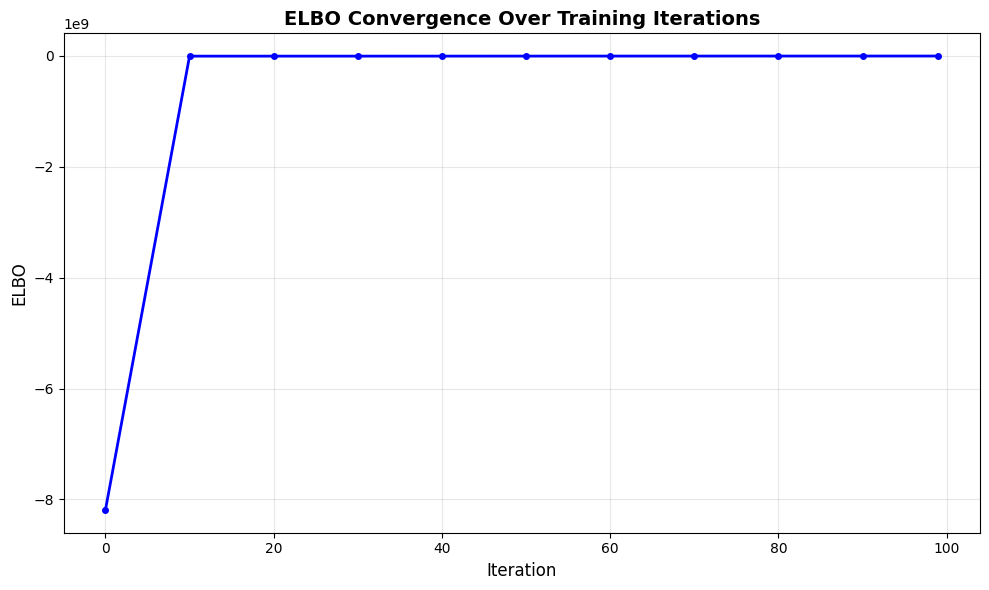

ELBO Training Progress:
Initial ELBO (iter 0): -8,190,241,299.71
Final ELBO (iter 99):   -3,772,291.61
Total improvement: 8,186,469,008.09
Number of iterations: 11


In [21]:
# Extract ELBO history
elbo_history = stage1_model['elbo_history']

# Create ELBO plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract iteration numbers and ELBO values
iterations = [entry[0] for entry in elbo_history]
elbo_values = [entry[1] for entry in elbo_history]

# Plot ELBO over iterations
ax.plot(iterations, elbo_values, linewidth=2, color='blue', marker='o', markersize=4)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('ELBO', fontsize=12)
ax.set_title('ELBO Convergence Over Training Iterations', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print ELBO improvement
print("="*70)
print("ELBO Training Progress:")
print("="*70)
print(f"Initial ELBO (iter {iterations[0]}): {elbo_values[0]:,.2f}")
print(f"Final ELBO (iter {iterations[-1]}):   {elbo_values[-1]:,.2f}")
print(f"Total improvement: {elbo_values[-1] - elbo_values[0]:,.2f}")
print(f"Number of iterations: {len(iterations)}")

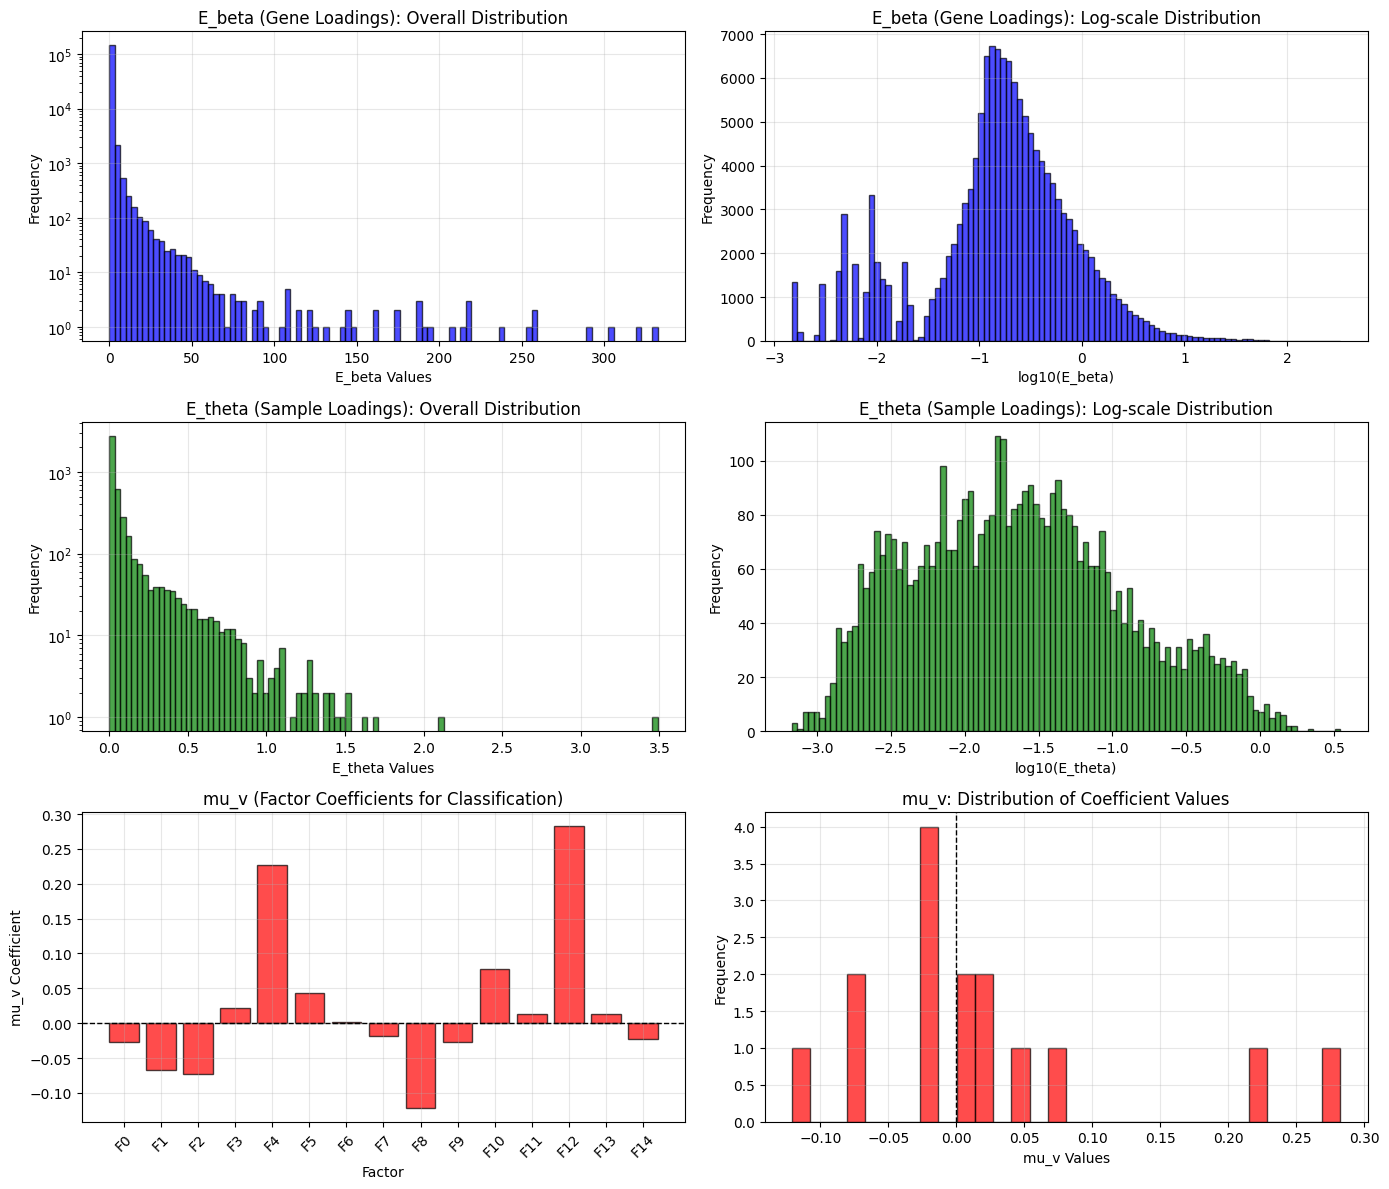

E_BETA (Gene Loadings) Statistics:
Shape: (9860, 15)
Mean: 0.626757
Std: 3.837684
Min: 0.001483
Max: 332.432356
Median: 0.178424

E_THETA (Sample Loadings) Statistics:
Shape: (300, 15)
Mean: 0.088393
Std: 0.191118
Min: 0.000679
Max: 3.489142
Median: 0.021029

MU_V (Classification Coefficients) Statistics:
Shape: (1, 15)
Mean: 0.021791
Std: 0.103164
Min: -0.120979
Max: 0.282726
Median: 0.001641

Top 3 most positive factors:
  Factor_12: 0.282726
  Factor_4: 0.226612
  Factor_10: 0.077994

Top 3 most negative factors:
  Factor_8: -0.120979
  Factor_2: -0.072180
  Factor_1: -0.067454


In [22]:
# Create distribution plots for E_beta, E_theta, and mu_v
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# E_beta distributions
# Overall distribution
axes[0, 0].hist(E_beta.flatten(), bins=100, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_xlabel('E_beta Values')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('E_beta (Gene Loadings): Overall Distribution')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(alpha=0.3)

# E_beta log-scale
axes[0, 1].hist(np.log10(E_beta.flatten() + 1e-10), bins=100, alpha=0.7, color='blue', edgecolor='black')
axes[0, 1].set_xlabel('log10(E_beta)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('E_beta (Gene Loadings): Log-scale Distribution')
axes[0, 1].grid(alpha=0.3)

# E_theta distributions
# Overall distribution
axes[1, 0].hist(E_theta.flatten(), bins=100, alpha=0.7, color='green', edgecolor='black')
axes[1, 0].set_xlabel('E_theta Values')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('E_theta (Sample Loadings): Overall Distribution')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(alpha=0.3)

# E_theta log-scale
axes[1, 1].hist(np.log10(E_theta.flatten() + 1e-10), bins=100, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].set_xlabel('log10(E_theta)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('E_theta (Sample Loadings): Log-scale Distribution')
axes[1, 1].grid(alpha=0.3)

# mu_v distributions
# Bar plot
factors = [f'F{i}' for i in range(mu_v.shape[1])]
axes[2, 0].bar(factors, mu_v[0], color='red', alpha=0.7, edgecolor='black')
axes[2, 0].set_xlabel('Factor')
axes[2, 0].set_ylabel('mu_v Coefficient')
axes[2, 0].set_title('mu_v (Factor Coefficients for Classification)')
axes[2, 0].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].grid(alpha=0.3)

# Histogram of mu_v values
axes[2, 1].hist(mu_v.flatten(), bins=30, alpha=0.7, color='red', edgecolor='black')
axes[2, 1].set_xlabel('mu_v Values')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('mu_v: Distribution of Coefficient Values')
axes[2, 1].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[2, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("="*70)
print("E_BETA (Gene Loadings) Statistics:")
print("="*70)
print(f"Shape: {E_beta.shape}")
print(f"Mean: {E_beta.mean():.6f}")
print(f"Std: {E_beta.std():.6f}")
print(f"Min: {E_beta.min():.6f}")
print(f"Max: {E_beta.max():.6f}")
print(f"Median: {np.median(E_beta):.6f}")

print("\n" + "="*70)
print("E_THETA (Sample Loadings) Statistics:")
print("="*70)
print(f"Shape: {E_theta.shape}")
print(f"Mean: {E_theta.mean():.6f}")
print(f"Std: {E_theta.std():.6f}")
print(f"Min: {E_theta.min():.6f}")
print(f"Max: {E_theta.max():.6f}")
print(f"Median: {np.median(E_theta):.6f}")

print("\n" + "="*70)
print("MU_V (Classification Coefficients) Statistics:")
print("="*70)
print(f"Shape: {mu_v.shape}")
print(f"Mean: {mu_v.mean():.6f}")
print(f"Std: {mu_v.std():.6f}")
print(f"Min: {mu_v.min():.6f}")
print(f"Max: {mu_v.max():.6f}")
print(f"Median: {np.median(mu_v):.6f}")
print(f"\nTop 3 most positive factors:")
top_positive = np.argsort(mu_v[0])[-3:][::-1]
for idx in top_positive:
    print(f"  Factor_{idx}: {mu_v[0, idx]:.6f}")
print(f"\nTop 3 most negative factors:")
top_negative = np.argsort(mu_v[0])[:3]
for idx in top_negative:
    print(f"  Factor_{idx}: {mu_v[0, idx]:.6f}")